# Analisis exploratorio, Procesamiento de Datos y Modelo

## Provincia = Bizcaia - Budget< 250.001

In [44]:
import pandas as pd
import numpy as np
import pandas_profiling

# Ampliamos el límite de columnas visibles para poder visualizarlas todas
pd.set_option('display.max_columns', 500)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle
%matplotlib inline
import plotly
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

b = '\033[94m'  # para texto azul
o = '\033[93m'  # para texto naranja
n = '\033[0m'   # para texto normal

# Omitimos los warnings
warnings.filterwarnings('ignore')

In [137]:
#df_casas= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\proyecto\idealista\spanish_houses_provincia.csv", header = 0)
df= pd.read_csv(r"C:\Users\hecto\Documents\Untitled Folder\houses_cleaned.csv",header=0)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75268 entries, 0 to 75267
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   provincia                 75268 non-null  object 
 1   ad_description            71707 non-null  object 
 2   ad_last_update            75268 non-null  object 
 3   air_conditioner           75268 non-null  int64  
 4   balcony                   75268 non-null  int64  
 5   bath_num                  75268 non-null  int64  
 6   built_in_wardrobe         75268 non-null  int64  
 7   chimney                   75268 non-null  int64  
 8   condition                 75268 non-null  float64
 9   construct_date            75268 non-null  float64
 10  energetic_certif          75268 non-null  object 
 11  floor                     75268 non-null  int64  
 12  garage                    75268 non-null  object 
 13  garden                    75268 non-null  int64  
 14  heatin

In [139]:
df.groupby('provincia').count().sort_values('house_id',ascending=False)['house_id']

provincia
bizkaia                   18870
balears                   15199
coruna                     6539
gipuzkoa                   5980
sevilla                    4331
madrid                     4272
albacete                   3621
alava                      3492
zamora                     2398
girona                     1626
alicante                   1395
segovia                    1219
ciudad_real                1098
valencia                   1094
santa_cruz_de_tenerife      971
soria                       914
barcelona                   778
cadiz                       632
huelva                      423
tarragona                   215
valladolid                  201
Name: house_id, dtype: int64

In [141]:
df=df.query("provincia=='bizkaia'& price<250001")

In [142]:
df.groupby('CC_AA').count().sort_values('house_id',ascending=False)['house_id']

CC_AA
Pais_Vasco    10101
Name: house_id, dtype: int64

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
air_conditioner,10101.0,5.841006e-03,7.620672e-02,0.0,0.0,0.0,0.0,1.0
balcony,10101.0,1.810712e-01,3.850962e-01,0.0,0.0,0.0,0.0,1.0
bath_num,10101.0,1.241362e+00,4.555009e-01,0.0,1.0,1.0,1.0,4.0
built_in_wardrobe,10101.0,2.267102e-01,4.187243e-01,0.0,0.0,0.0,0.0,1.0
chimney,10101.0,1.980002e-03,4.445534e-02,0.0,0.0,0.0,0.0,1.0
condition,10101.0,2.122562e+00,4.000332e-01,1.0,2.0,2.0,2.0,3.0
construct_date,10101.0,4.496248e+02,8.270397e+02,0.0,0.0,0.0,0.0,2109.0
floor,10101.0,2.511039e+00,1.911612e+00,0.0,1.0,2.0,4.0,10.0
garden,10101.0,9.315909e-02,2.906696e-01,0.0,0.0,0.0,0.0,1.0
house_id,10101.0,6.353189e+07,2.606739e+07,301766.0,38366145.0,82483719.0,84097146.0,84872928.0


## 2 Preprocessat

In [144]:
df.isnull().values.any()

True

In [145]:
df.isna().values.any()

True

In [146]:
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

In [147]:
from scipy import stats

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in columnas_numeric:
    shapiro_test = stats.shapiro(df[i])
    print('Var:', i, "p-value =", shapiro_test.pvalue, end=". ")
    if shapiro_test.pvalue>0.05:
        print('Distribución NORMAL')
    else:
        print("Distribución no normal")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Var: air_conditioner p-value = 0.0. Distribución no normal
Var: balcony p-value = 0.0. Distribución no normal
Var: bath_num p-value = 0.0. Distribución no normal
Var: built_in_wardrobe p-value = 0.0. Distribución no normal
Var: chimney p-value = 0.0. Distribución no normal
Var: condition p-value = 0.0. Distribución no normal
Var: construct_date p-value = 0.0. Distribución no normal
Var: floor p-value = 0.0. Distribución no normal
Var: garden p-value = 0.0. Distribución no normal
Var: house_id p-value = 0.0. Distribución no normal
Var: lift p-value = 0.0. Distribución no normal
Var: m2_real p-value = 0.0. Distribución no normal
Var: m2_useful p-value = 0.0. Distribución no normal
Var: price p-value = 1.4289518003236802e-37. Distribución no normal
Var: reduced_mobility p-value = 0.0. Distribución no normal
Var: room_num p-value = 0.0. Distribución no normal
Var: s

In [148]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


columnsNorm = ['bath_num','condition','construct_date','floor','room_num','floor_count']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['m2_real','m2_useful']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

## Distribución de las variables Post-procesado

<Figure size 576x360 with 0 Axes>

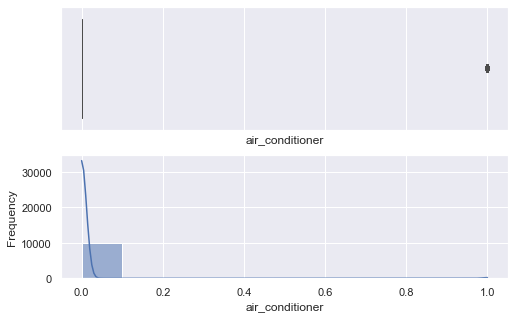

<Figure size 576x360 with 0 Axes>

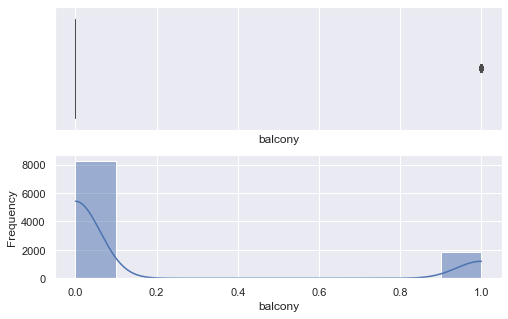

<Figure size 576x360 with 0 Axes>

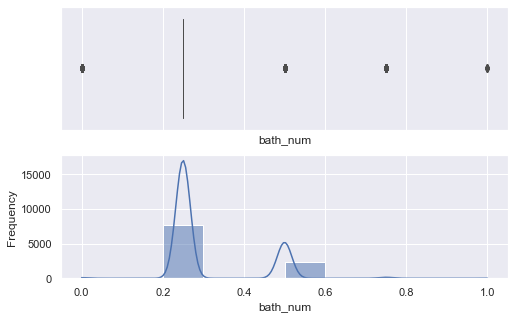

<Figure size 576x360 with 0 Axes>

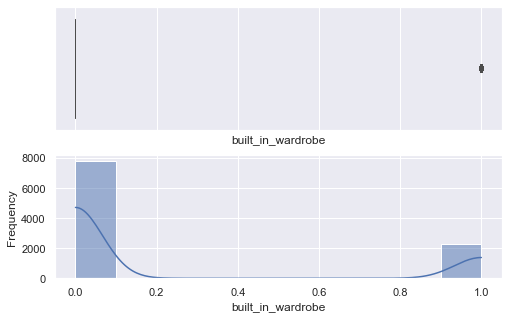

<Figure size 576x360 with 0 Axes>

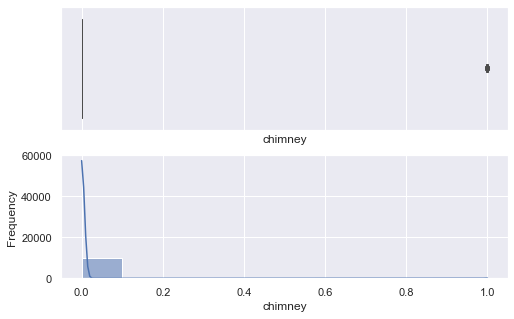

<Figure size 576x360 with 0 Axes>

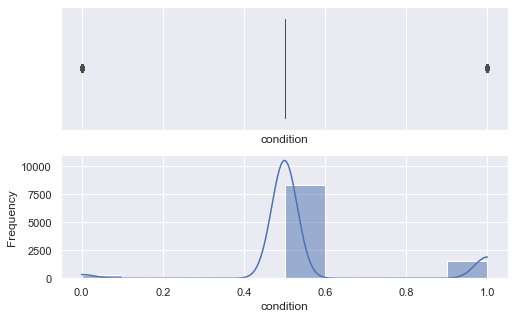

<Figure size 576x360 with 0 Axes>

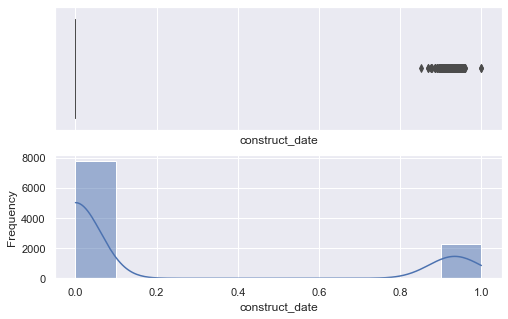

<Figure size 576x360 with 0 Axes>

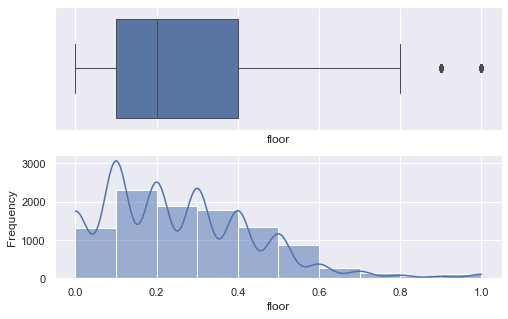

<Figure size 576x360 with 0 Axes>

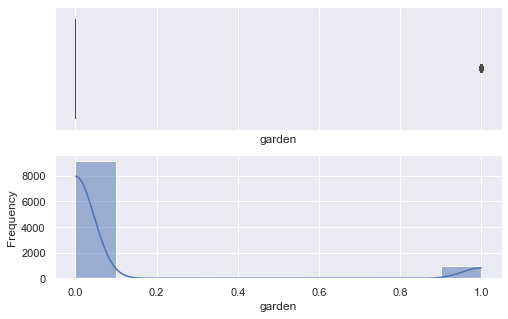

<Figure size 576x360 with 0 Axes>

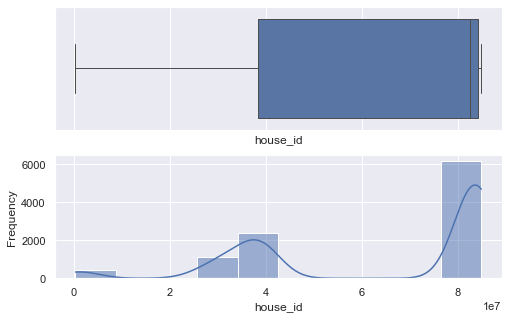

<Figure size 576x360 with 0 Axes>

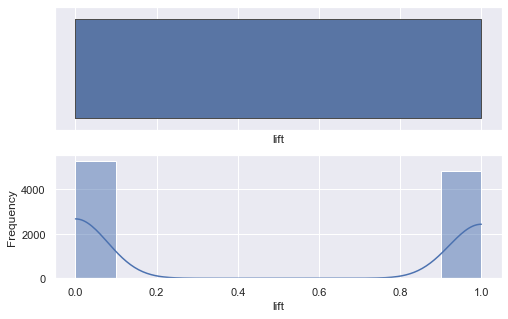

<Figure size 576x360 with 0 Axes>

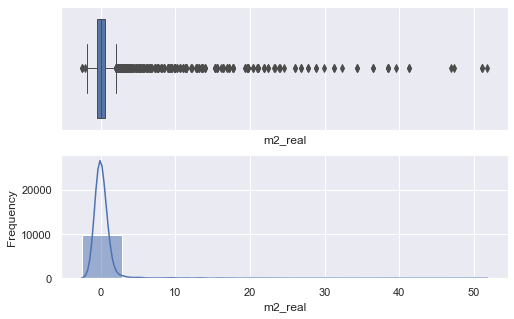

<Figure size 576x360 with 0 Axes>

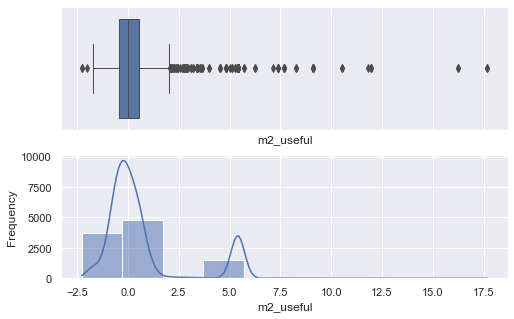

<Figure size 576x360 with 0 Axes>

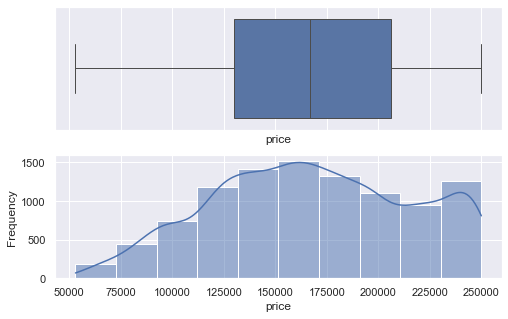

<Figure size 576x360 with 0 Axes>

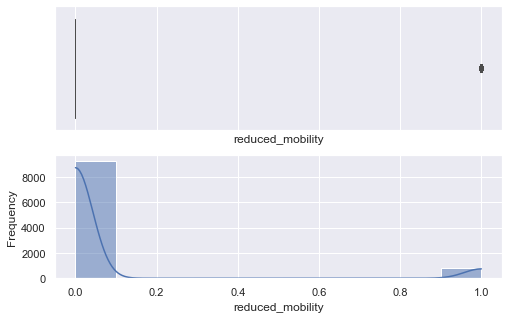

<Figure size 576x360 with 0 Axes>

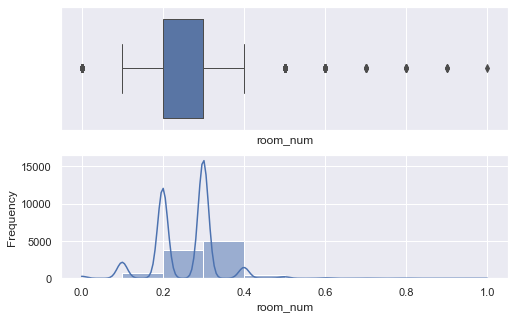

<Figure size 576x360 with 0 Axes>

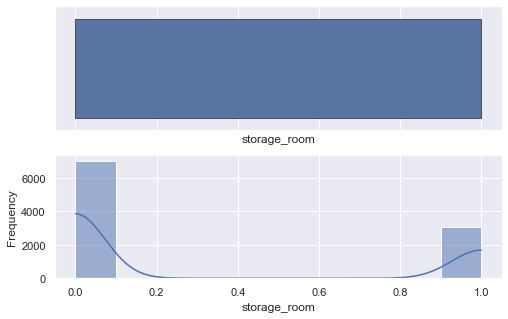

<Figure size 576x360 with 0 Axes>

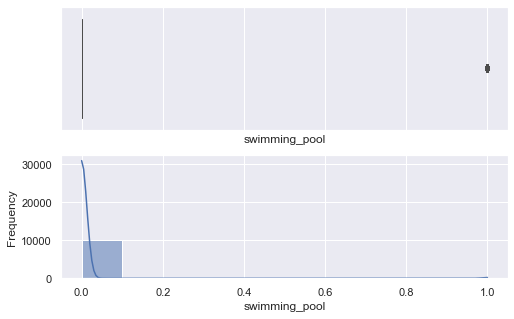

<Figure size 576x360 with 0 Axes>

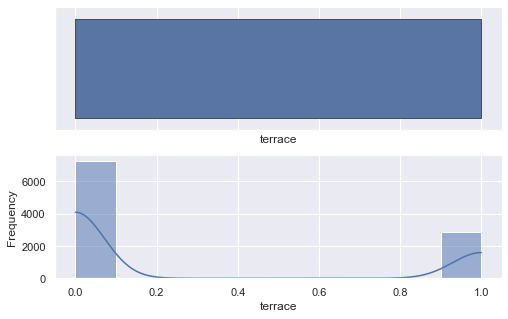

<Figure size 576x360 with 0 Axes>

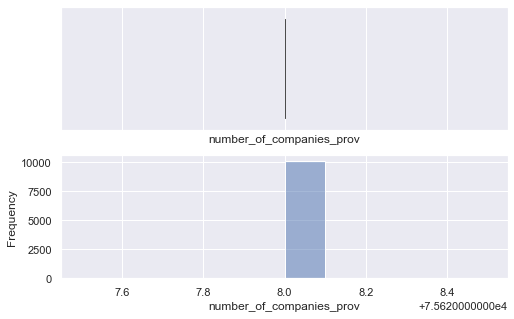

<Figure size 576x360 with 0 Axes>

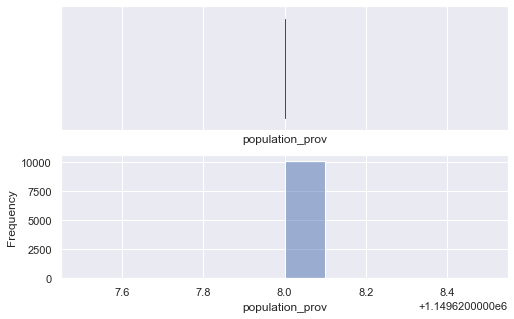

<Figure size 576x360 with 0 Axes>

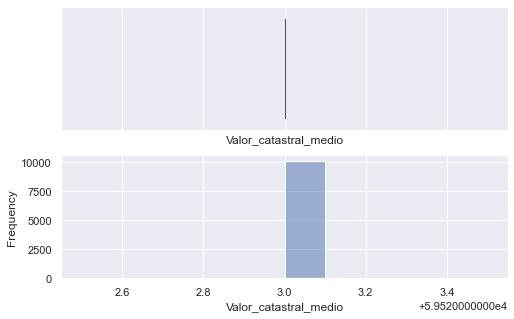

<Figure size 576x360 with 0 Axes>

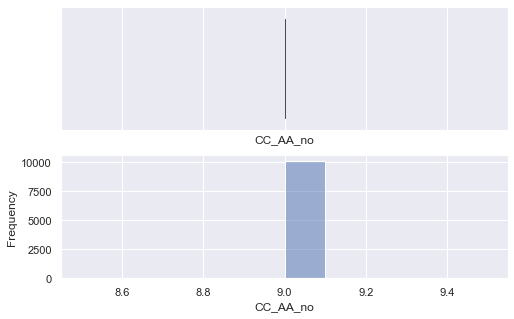

<Figure size 576x360 with 0 Axes>

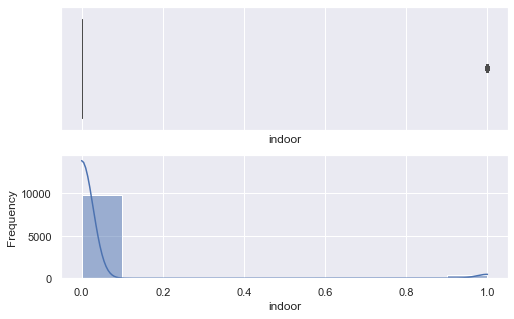

<Figure size 576x360 with 0 Axes>

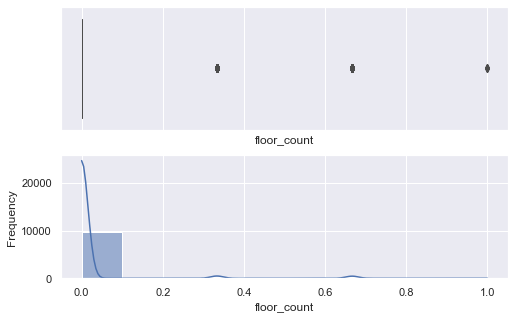

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in columnas_numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

## 3 Test/train

In [150]:

data = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
data=data.drop(['house_id','chimney','floor_count','construct_date'], axis=1)
data.shape

(10101, 21)

In [151]:
from sklearn.model_selection import train_test_split
#   

X = data.drop(['price'], axis=1)
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7070 entries, 36460 to 31654
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   air_conditioner           7070 non-null   int64  
 1   balcony                   7070 non-null   int64  
 2   bath_num                  7070 non-null   float64
 3   built_in_wardrobe         7070 non-null   int64  
 4   condition                 7070 non-null   float64
 5   floor                     7070 non-null   float64
 6   garden                    7070 non-null   int64  
 7   lift                      7070 non-null   int64  
 8   m2_real                   7070 non-null   float64
 9   m2_useful                 7070 non-null   float64
 10  reduced_mobility          7070 non-null   float64
 11  room_num                  7070 non-null   float64
 12  storage_room              7070 non-null   float64
 13  swimming_pool             7070 non-null   float64
 14  ter

In [153]:
X.isnull().values.any()

False

## 4 Models

In [154]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth= 4,random_state = 123)

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=123)

### Training the models

In [156]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [157]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [158]:
y_pred_rf[1:5]

array([123575.25666667, 170318.        , 179413.28571429, 182966.46      ])

In [159]:
y_test[1:5]

42092    120000.0
40773    155000.0
34866    187001.0
33312    247200.0
Name: price, dtype: float64

### 5 Evaluació

In [160]:
from sklearn.metrics import r2_score

r2_dt = r2_score(y_test, y_pred_dt)
r2_rf= r2_score(y_test, y_pred_rf)

In [161]:
from sklearn.metrics import mean_squared_error

mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf= mean_squared_error(y_test, y_pred_rf)

rmse_dt=np.sqrt(mse_dt)
rmse_rf=np.sqrt(mse_rf)

In [162]:
metrics = pd.DataFrame( data = [['Decision Tree Regressor', r2_dt, mse_dt,rmse_dt],
                                 ['Radom Forest', r2_rf, mse_rf,rmse_rf]],
                                  columns = ['Model', 'R2', 'MSE','RMSE'])
metrics.head()

,Model,R2,MSE,RMSE
0,Decision Tree Regressor,0.324782,1.563764e+09,39544.451082
1,Radom Forest,0.508411,1.138489e+09,33741.510021


In [163]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': dt.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,bath_num,0.498885
7,lift,0.251457
8,m2_real,0.157320
4,condition,0.045663
3,built_in_wardrobe,0.044554
9,m2_useful,0.002122
0,air_conditioner,0.000000
13,swimming_pool,0.000000
18,CC_AA_no,0.000000
17,Valor_catastral_medio,0.000000


Profundidad del árbol: 4
Número de nodos terminales: 16


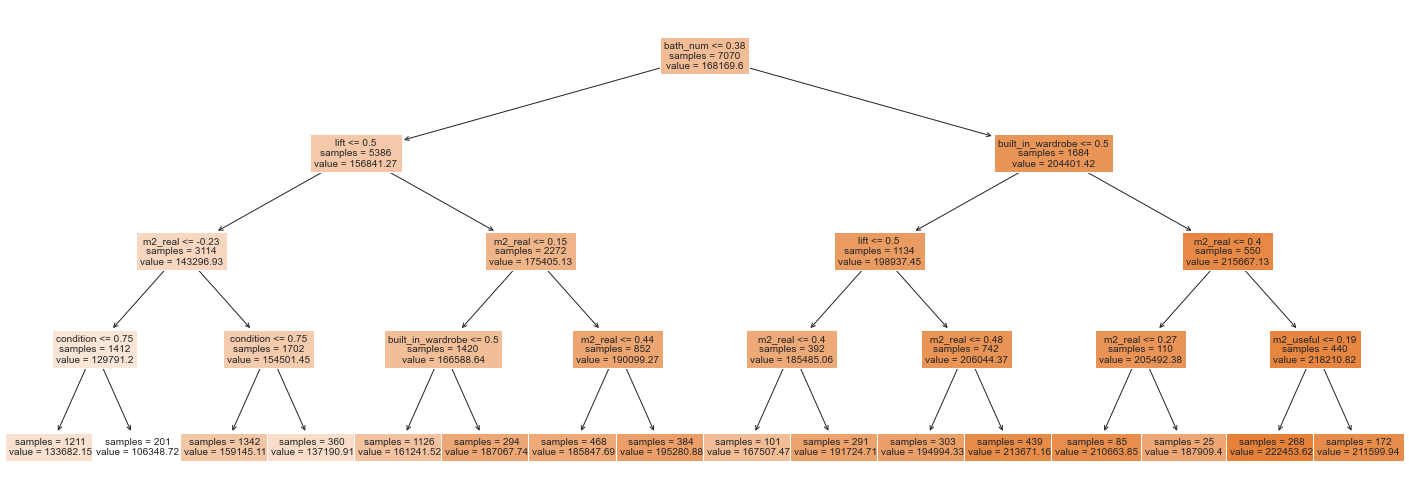

In [164]:
from sklearn.tree import plot_tree
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(25, 9))

print(f"Profundidad del árbol: {dt.get_depth()}")
print(f"Número de nodos terminales: {dt.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dt,
            feature_names = data.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [165]:
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = dt,
                    feature_names = list(data.drop(columns = "price").columns)
               )
print(texto_modelo)

|--- bath_num <= 0.38
|   |--- lift <= 0.50
|   |   |--- m2_real <= -0.23
|   |   |   |--- condition <= 0.75
|   |   |   |   |--- value: [133682.15]
|   |   |   |--- condition >  0.75
|   |   |   |   |--- value: [106348.72]
|   |   |--- m2_real >  -0.23
|   |   |   |--- condition <= 0.75
|   |   |   |   |--- value: [159145.11]
|   |   |   |--- condition >  0.75
|   |   |   |   |--- value: [137190.91]
|   |--- lift >  0.50
|   |   |--- m2_real <= 0.15
|   |   |   |--- built_in_wardrobe <= 0.50
|   |   |   |   |--- value: [161241.52]
|   |   |   |--- built_in_wardrobe >  0.50
|   |   |   |   |--- value: [187067.74]
|   |   |--- m2_real >  0.15
|   |   |   |--- m2_real <= 0.44
|   |   |   |   |--- value: [185847.69]
|   |   |   |--- m2_real >  0.44
|   |   |   |   |--- value: [195280.88]
|--- bath_num >  0.38
|   |--- built_in_wardrobe <= 0.50
|   |   |--- lift <= 0.50
|   |   |   |--- m2_real <= 0.40
|   |   |   |   |--- value: [167507.47]
|   |   |   |--- m2_real >  0.40
|   |   |   |  

In [166]:
df.to_csv('Pred_dt_prov_pisos_500.csv', index=False)

In [167]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': rf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,m2_real,0.237453
2,bath_num,0.187089
9,m2_useful,0.131788
5,floor,0.111936
7,lift,0.094160
11,room_num,0.046185
4,condition,0.034244
3,built_in_wardrobe,0.031592
12,storage_room,0.030183
14,terrace,0.028337


In [168]:
df.to_csv('Pred_rf_prov_pisos_500.csv', index=False)

### Cross Validation

In [169]:
from sklearn.model_selection import cross_val_score

cv_dt = cross_val_score(dt, X, y, cv=5, scoring='r2')
cv_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')

In [170]:
cv_lr_mean = [cv_dt.mean(), cv_rf.mean()]
metrics['R2 with CV'] = cv_lr_mean
metrics.head()

,Model,R2,MSE,RMSE,R2 with CV
0,Decision Tree Regressor,0.324782,1.563764e+09,39544.451082,0.329416
1,Radom Forest,0.508411,1.138489e+09,33741.510021,0.524296


In [171]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


### Grid Search basado en out-of-bag error

In [172]:
from sklearn.model_selection import ParameterGrid

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None,100]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 100, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 100, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 100, 'max_features': 9, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
1,0.518109,NaN,7.0,150.0
4,0.518109,100.0,7.0,150.0
0,0.517594,NaN,5.0,150.0
3,0.517594,100.0,5.0,150.0


In [173]:

from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(max_depth=100, max_features=5, random_state=123)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
r2_rf2= r2_score(y_test, y_pred_rf2)

In [174]:
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
rmse_rf2=np.sqrt(mse_rf2)

In [175]:
metrics = pd.DataFrame( data = [['Random Forest Optimizado', r2_rf2, mse_rf2, rmse_rf2],
                                 ['Radom Forest', r2_rf, mse_rf,rmse_rf]],
                                  columns = ['Model', 'R2', 'MSE','RMSE'])
metrics.head()

,Model,R2,MSE,RMSE
0,Random Forest Optimizado,0.524342,1.101594e+09,33190.272207
1,Radom Forest,0.508411,1.138489e+09,33741.510021


In [176]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=123, shuffle=True)

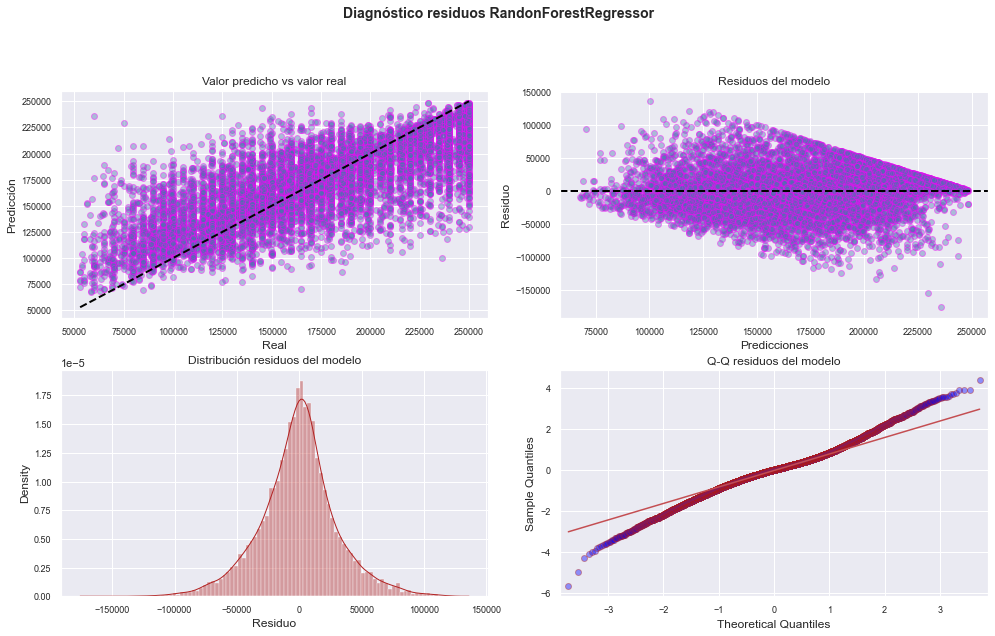

In [177]:
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm

# Gráficos: Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==================================================================================
cv_predicciones = cross_val_predict(estimator = rf2, X=X, y=y , cv = cv)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))

axes[0, 0].scatter(y, cv_predicciones, edgecolors=(1, 0, 1), alpha = 0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 12, fontweight = "normal")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 9)

axes[0, 1].scatter(cv_predicciones, y - cv_predicciones, edgecolors=(1, 0, 1), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 12, fontweight = "normal")
axes[0, 1].set_xlabel('Predicciones')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 9)

sns.histplot(data = y - cv_predicciones,stat = "density",kde  = True,line_kws= {'linewidth': 1},color = "firebrick",alpha = 0.4, ax = axes[1, 0])

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 12,fontweight = "normal")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 9)


sm.qqplot( y - cv_predicciones, fit = True, line  = 'q', ax  = axes[1, 1], color = 'firebrick',alpha = 0.4, lw = 2)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 12, fontweight = "normal")
axes[1, 1].tick_params(labelsize = 9)

fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle('Diagnóstico residuos RandonForestRegressor', fontsize = 14, fontweight = "bold")
#fig.write_png("GraficoIdealista_residuos.png")
plt.savefig("GraficoIdealista_residuos.png")